<a href="https://colab.research.google.com/github/JulioCFSdev/Redes-Neurais-Artificiais/blob/main/atividade_2.2/Lucas_Julio_RNA_2022_2_AA2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais 2022.2
## Atividade Avaliativa 2.2

- **Disciplina**: Redes Neurais Artificiais 2022.2  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  

O Abalone é um gênero (_Haliotis_) de um moluscos gastrópodes marinhos da família _Haliotidae_. Foi identificado por Linnaeus em 1758 e suas diversas espécies podem ser encontradas em águas costeiras de quase todo o mundo. É usado na indústria alimentícia e em itens decorativos, tais como jóias ou instrumentos musicais [1](https://pt.wikipedia.org/wiki/Abalone). A idade do abalone pode ser obtida diretamente a partir de medidas físicas, porém é necessário cortar a concha, efetuar um processo de pigmentação, e então contar o número de anéis por meio de um microscópio -- tarefa considerada monótona e custosa [2](https://archive.ics.uci.edu/ml/datasets/Abalone).

Outras medidas do Abalone, entretanto, são mais fáceis de obter, não danificam a concha e podem ser utilizadas para estimar a idade com um modelo inteligente por meio de um processo de Aprendizado Supervisionado. Nesta Atividade Avaliativa de caráter prático, almeja-se a proposição e avaliação de múltiplas Redes Neurais Artificiais (RNAs) do tipo _Feedforward Multilayer Perceptron_ (MLP) para o problema da classificação multi-classe da idade do abalone a partir de atributos preditores.

Base de dados original: https://archive.ics.uci.edu/ml/datasets/Abalone  
Base de dados preparada: abalone.csv (Disponível no Google Classroom)  
Base de dados a ser utilizada: abalone.csv com One-Hot-Encoding do atributo Sex (exportar a partir da Atividade Avaliativa 1.2)

## Equipe

Integrante 1 (Matrícula)  
Integrante 2 (Matrícula)

In [ ]:
## bibliotecas
##Equipe = {
##    Lucas: (2115310015),
##    Julio: (2115310019)
##}

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Aquecimento

1. Abrir a base de dados
2. Separar os atributos preditores (X) e o atributo-alvo (y) nas respectivas variáveis
3. Imprimir a dimensão da base de dados (quantidade de exemplos, quantidade de atributos preditores)
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória

In [ ]:
url = 'https://raw.githubusercontent.com/JulioCFSdev/Redes-Neurais-Artificiais/main/atividade_2.2/abalone-One-Hot-Encoding.csv?token=GHSAT0AAAAAAB46FRJ33OA3AVRZPV2S6ZHQY7ZGJGA'
data = pd.read_csv(url)

In [ ]:
print(len(data))
data.info()

4176
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4176 non-null   float64
 1   Diameter        4176 non-null   float64
 2   Height          4176 non-null   float64
 3   Whole weight    4176 non-null   float64
 4   Shucked weight  4176 non-null   float64
 5   Viscera weight  4176 non-null   float64
 6   Shell weight    4176 non-null   float64
 7   Age             4176 non-null   int64  
 8   Sex_F           4176 non-null   int64  
 9   Sex_I           4176 non-null   int64  
 10  Sex_M           4176 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 359.0 KB


In [ ]:
predictive_attributes = data.drop(columns=['Age'], axis=1)
target_attributes = data.Age

In [ ]:
print("Quantidade de atributos preditores : {}".format(len(predictive_attributes)))
predictive_attributes.head()

Quantidade de atributos preditores : 4176


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0,1,0


In [ ]:
predictive_attributes.tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0
4175,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,0,0,1


In [ ]:
target_attributes

0        7
1        9
2       10
3        7
4        8
        ..
4171    11
4172    10
4173     9
4174    10
4175    12
Name: Age, Length: 4176, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(predictive_attributes, target_attributes,test_size=0.30,shuffle=True)

In [ ]:
print("X_train : {}\nX_test : {}\nY_train: {}\nY_test : {}".format(len(X_train),len(X_test), len(Y_train), len(Y_test)))
print("Porcentagem de dados X_train : {}\nPorcentagem de dados X_test : {}".format(len(X_train)/len(data), len(X_test)/len(data)))

X_train : 2923
X_test : 1253
Y_train: 2923
Y_test : 1253
Porcentagem de dados X_train : 0.6999521072796935
Porcentagem de dados X_test : 0.3000478927203065


In [ ]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2070,0.565,0.440,0.135,0.8300,0.3930,0.1735,0.2380,1,0,0
368,0.690,0.560,0.215,1.7190,0.6800,0.2990,0.4700,1,0,0
1745,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,0,0,1
1736,0.670,0.550,0.155,1.5660,0.8580,0.3390,0.3540,1,0,0
4151,0.370,0.280,0.090,0.2180,0.0995,0.0545,0.0615,0,1,0
...,...,...,...,...,...,...,...,...,...,...
2012,0.470,0.365,0.135,0.5220,0.2395,0.1525,0.1450,0,0,1
281,0.455,0.355,0.120,0.4495,0.1770,0.1040,0.1500,1,0,0
2912,0.590,0.500,0.150,1.1420,0.4850,0.2650,0.3450,0,0,1
3968,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.0820,0,1,0


## Normalização dos Atributos Preditores

O treinamento de uma RNA MLP é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito por meio do escalonamento dos atributos preditores para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a normalização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se efetuar as seguintes operações

X_train_norm = (X_train - min(X_train))/(max(X_train) - min(X_train))

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_norm = (X_test - min(X_train)))/(max(X_train) - min(X_train))

Se todo o conjunto X for utilizado no escalonamento, a rede neural receberá informações do conjunto de teste por meio dos valores mínimo e máximo utilizados para preparar os dados de treinamento, o que não é desejável.

In [ ]:
X_train_min = X_train.min()
X_train_max = X_train.max()
X_train_norm = (X_train - X_train_min)/(X_train_max - X_train_min)
X_test_norm = (X_test - X_train_min)/(X_train_max - X_train_min)

In [ ]:
X_train_norm

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
1748,0.869565,0.898148,0.190265,0.710204,0.664423,0.587731,0.558166,0.0,0.0,1.0
798,0.456522,0.472222,0.097345,0.127240,0.082464,0.104222,0.127517,1.0,0.0,0.0
2696,0.797101,0.787037,0.146018,0.510559,0.465500,0.390501,0.416667,0.0,0.0,1.0
291,0.724638,0.712963,0.146018,0.393256,0.286436,0.288259,0.348993,0.0,0.0,1.0
3767,0.652174,0.694444,0.128319,0.312156,0.223494,0.287599,0.298098,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
541,0.449275,0.435185,0.101770,0.099556,0.065634,0.072559,0.123602,0.0,0.0,1.0
2361,0.797101,0.805556,0.181416,0.482165,0.335241,0.381266,0.455257,1.0,0.0,0.0
3017,0.478261,0.425926,0.092920,0.134694,0.116459,0.094987,0.130872,0.0,1.0,0.0
4050,0.746377,0.759259,0.154867,0.372138,0.308987,0.337731,0.337808,0.0,0.0,1.0


In [ ]:
X_test_norm

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2070,0.659420,0.648148,0.119469,0.291748,0.262874,0.226253,0.262864,1.0,0.0,0.0
368,0.840580,0.870370,0.190265,0.607276,0.456075,0.391821,0.522371,1.0,0.0,0.0
1745,0.855072,0.879630,0.154867,0.656078,0.566813,0.516491,0.600671,0.0,0.0,1.0
1736,0.811594,0.851852,0.137168,0.552972,0.575900,0.444591,0.392617,1.0,0.0,0.0
4151,0.376812,0.351852,0.079646,0.074534,0.065298,0.069261,0.065436,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2012,0.521739,0.509259,0.119469,0.182431,0.159542,0.198549,0.158837,0.0,0.0,1.0
281,0.500000,0.490741,0.106195,0.156699,0.117469,0.134565,0.164430,1.0,0.0,0.0
2912,0.695652,0.759259,0.132743,0.402484,0.324806,0.346966,0.382550,0.0,0.0,1.0
3968,0.391304,0.388889,0.079646,0.095475,0.109727,0.079815,0.088367,0.0,1.0,0.0


## Treinando a primeira RNA MLP para o Abalone

1. Treine uma RNA MLP Classificadora para este problema com uma única camada e dez neurônios  
    1.1 Utilize a função de ativação ReLU  
    1.2 Utilize o solver Adam    
    1.3 Imprima o passo a passo do treinamento    
    1.4 Utilize o número máximo de épocas igual a 300  
2. Imprima um gráfico com a perda da RNA MLP ao longo do treinamento  
    2.1 Houve Early Stopping?  
3. Com o modelo em questão, após o treinamento, apresente:  
    3.1 Matriz de confusão para o conjunto de teste  
    3.2 Acurácia  
    3.3 F-Score  
    3.4 Precisão  
    3.5 Revocação  
    
No tocante ao Passo 3, construa funções para esta tarefa, pois serão recorrentemente utilizadas ao longo do trabalho

In [ ]:
# Treina uma rede neural por classificação, realiza a previsão utilizando o modelo treinado e retorna os arrays de previsão e de perdas durante o treinamento
def neural_network_classification(x_train, x_test, y_train, hidder_layer, activation_function, solver, max_epochs):
  rede = MLPClassifier(hidden_layer_sizes=hidder_layer, activation=activation_function, solver=solver, max_iter = max_epochs, early_stopping=True, verbose=True)
  rede.fit(x_train.values,y_train)
  log_loss = rede.loss_curve_
  y_prev = rede.predict(x_test)
  return y_prev, log_loss

# Exibe os gráficos dos atributos de treinamento preditores, de teste e previsões
def plot_results(X_train, y_train, X_test, y_test, y_prev):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(X_train, y_train, '.', color = "darkblue")
    ax[0].set_title("Treinamento: " + str(len(X_train)) + " exemplos")
    ax[1].plot(X_test, y_test, '.', color="blue")
    ax[1].set_title("Teste: " + str(len(X_test)) + " exemplos")
    ax[2].plot(X_test, y_prev, '.', color="blue")
    ax[2].set_title("Previsões: " + str(len(X_test)) + " exemplos")
    plt.show()

# Exibe a matriz de confusão
def confusion_matrix_plot(y_test, y_prev):
  cnf_matrix = metrics.confusion_matrix(y_test, y_prev)
  fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix, figsize=(10, 10), show_absolute=True, colorbar=True, )
  plt.title("Matriz de Confusão")
  plt.show()

# Exibe as métricas de Acurácia, f_score, precisão, renovação
def show_metrics(y_test, y_prev):
  print("Acurácia: ",accuracy_score(y_test,y_prev))
  print("F-score: ",f1_score(y_test,y_prev, average='micro'))
  print("Precisão: ", precision_score(y_test,y_prev, average='micro'))
  print("Revocação: ", recall_score(y_test,y_prev, average='micro'))

# Exibe um gráfico de perda do treinamento de um modelo
def show_loss_log(loss_log):
  plt.title("Curva da perda da RNA durante o treino")
  plt.xlabel("Época")
  plt.ylabel("Perda")
  plt.plot(loss_log)
  plt.show

In [ ]:
## PARAMETROS E HIPEPARÂMETROS
HIDDER_LAYER = (10,)
ATIVACAO = "relu"
SOLVER = 'adam'
EPOCHS = 300

In [ ]:
y_prev,log_loss = neural_network_classification(X_train_norm, X_test_norm, Y_train, HIDDER_LAYER, ATIVACAO, SOLVER, EPOCHS)

Iteration 1, loss = 3.24958725
Validation score: 0.017065
Iteration 2, loss = 3.19978474
Validation score: 0.054608
Iteration 3, loss = 3.15364840
Validation score: 0.061433
Iteration 4, loss = 3.10608235
Validation score: 0.098976
Iteration 5, loss = 3.05488354
Validation score: 0.095563
Iteration 6, loss = 3.00040069
Validation score: 0.088737
Iteration 7, loss = 2.94142320
Validation score: 0.156997
Iteration 8, loss = 2.88090705
Validation score: 0.170648
Iteration 9, loss = 2.82045602
Validation score: 0.153584
Iteration 10, loss = 2.76317346
Validation score: 0.143345
Iteration 11, loss = 2.71022688
Validation score: 0.143345
Iteration 12, loss = 2.66188690
Validation score: 0.174061
Iteration 13, loss = 2.61945718
Validation score: 0.201365
Iteration 14, loss = 2.58337649
Validation score: 0.191126
Iteration 15, loss = 2.55364801
Validation score: 0.201365
Iteration 16, loss = 2.53026521
Validation score: 0.191126
Iteration 17, loss = 2.51091187
Validation score: 0.191126
Iterat

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


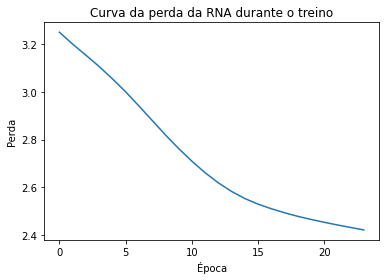

In [ ]:
# Exibindo a curva de perda da RNA
show_loss_log(log_loss)

**Resposta da Pergunta 2.1** : Sim, O gráfico não apresenta as 300 épocas máximas. Logo, assumi-se que houve um Early Stopping tendo a tol = 0.000100 em 10 épocas consecutivas.

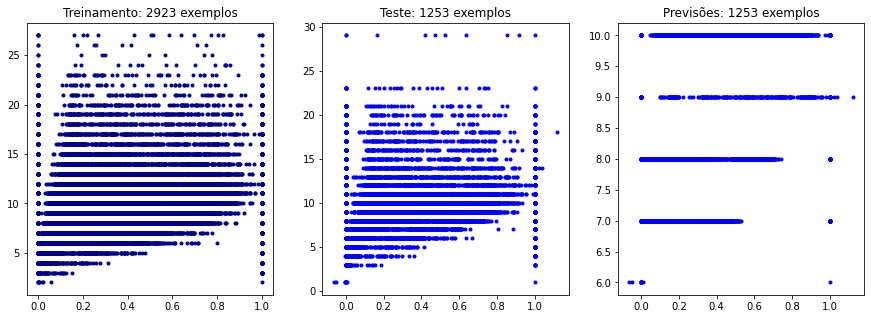

In [ ]:
# Exibe os gráficos dos atributos de treinamento preditores, de teste e previsões
plot_results(X_train_norm, Y_train, X_test_norm, Y_test, y_prev)

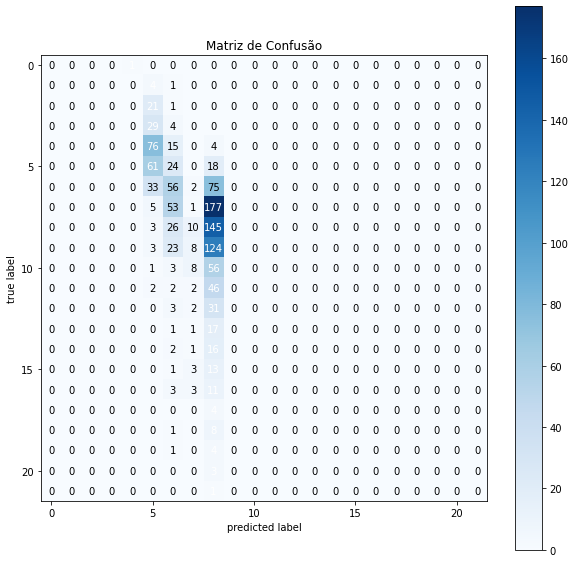

In [ ]:
confusion_matrix_plot(Y_test, y_prev)

In [ ]:
# Métricas
show_metrics(Y_test, y_prev)

Acurácia:  0.20989624900239426
F-score:  0.20989624900239426
Precisão:  0.20989624900239426
Revocação:  0.20989624900239426


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 arquiteturas de neurônios para RNAS MLPs segundo a regra da pirâmide geométrica  
    3.1 Ao final desta etapa, deve-se obter uma lista contendo 30 elementos do tipo 2-tupla  
    3.2 Obtenha as arquiteturas usando laços, listas, tuplas, etc. Soluções _hard-coded_ são desencorajadas  

In [ ]:
def pyramid_rule(a):
  input_layer = X_train.shape[1]
  output_layer = 1
  Nh = a * np.sqrt(input_layer * output_layer)
  return Nh

In [ ]:
a = [0.5, 2, 3]

number_of_neurons_1 = pyramid_rule(a[0])
number_of_neurons_2 = pyramid_rule(a[1])
number_of_neurons_3 = pyramid_rule(a[2])

print(number_of_neurons_1)
print(number_of_neurons_2)
print(number_of_neurons_3)

1.5811388300841898
6.324555320336759
9.486832980505138


In [ ]:
from itertools import combinations_with_replacement
import random



def combinations_architecture(number_of_neurons):
  number_of_neurons = np.round(number_of_neurons, decimals=0)
  
  # lista de números
  numbers = [1,2,3,4,5,6,7,8,9]


  # conjunto para armazenar as combinações únicas
  combinations_set = set()

  # loop para gerar as combinações
  for a, b in combinations_with_replacement(numbers, 2):
      if a + b <= int(number_of_neurons):
        combinations_set.add((b, a))
        combinations_set.add((a, b))


  # converter o conjunto em uma lista
  combinations_list = list(combinations_set)
  return combinations_list

In [ ]:
list_architeture_3 = combinations_architecture(number_of_neurons_3)
list_architeture_2 = combinations_architecture(number_of_neurons_2)
list_architeture_1 = combinations_architecture(number_of_neurons_1)

print(len(list_architeture_1))
print(len(list_architeture_2))
print(len(list_architeture_3))

1
15
36


In [ ]:
# Concatena as listas
list_architetures = np.concatenate([list_architeture_3, list_architeture_2, list_architeture_1])

# Mantém apenas os valores únicos
list_architetures = set([tuple(arr) for arr in list_architetures])

# Converte de volta em lista com apenas arrays únicos
list_architetures = [np.array(tupla) for tupla in list_architetures]

print(list_architetures)
print(len(list_architetures))

# Seleciona aleatoriamente 30 das arquiteturas definidas.
list_architetures = random.sample(list_architetures, 30)
print(list_architetures)
print(len(list_architetures))


[array([3, 4]), array([4, 3]), array([3, 1]), array([5, 4]), array([5, 1]), array([2, 2]), array([1, 6]), array([2, 5]), array([1, 3]), array([6, 2]), array([7, 1]), array([4, 2]), array([4, 5]), array([3, 3]), array([3, 6]), array([5, 3]), array([2, 4]), array([1, 2]), array([2, 1]), array([2, 7]), array([1, 5]), array([6, 1]), array([1, 8]), array([3, 2]), array([4, 1]), array([3, 5]), array([5, 2]), array([4, 4]), array([8, 1]), array([1, 1]), array([1, 4]), array([2, 3]), array([1, 7]), array([2, 6]), array([7, 2]), array([6, 3])]
36
[array([1, 7]), array([2, 6]), array([1, 3]), array([2, 4]), array([4, 3]), array([5, 3]), array([2, 5]), array([1, 6]), array([2, 3]), array([1, 1]), array([3, 4]), array([5, 2]), array([1, 4]), array([6, 2]), array([1, 8]), array([4, 4]), array([3, 2]), array([3, 3]), array([6, 3]), array([1, 5]), array([4, 5]), array([5, 1]), array([7, 2]), array([4, 1]), array([1, 2]), array([4, 2]), array([8, 1]), array([6, 1]), array([2, 1]), array([3, 1])]
30


## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de _Machine Learning_ é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: MLPClassifier). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

Sua busca em grade deve considerar:

1. Validação Cruzada Holdout 70/30 com normalização, como definido anteriormente, com aferição de desempenho no conjunto de testes
2. Parâmetros:  
  2.1 30 arquiteturas propostas para o número de neurônios ocultos no item anterior  
  2.2 Funções de ativação (ReLU e Sigmóide)
3. Hiperparâmetros:  
  3.1 Batch_size: 16 ou 32  
  3.2 Solver: Adam  
  3.3 $\beta_1$: 1, 0.9, 0.8  
  3.4 $\beta_1$: 0.999, 0.95, 0.9  
  3.5 Paciência (n_iter_no_change): 25 ou 50    
4. Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
5. Apresente as três propostas com melhor desempenho na busca em grade

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'hidden_layer_sizes': list_architetures,
    'activation': ['relu', 'logistic'],
    'batch_size': [16],
    'solver': ['adam'],
    'beta_1': [1, 0.9, 0.8],
    'beta_2': [0.999, 0.95, 0.9],
    'learning_rate_init': [0.009, 0.09, 0.32],
    'n_iter_no_change': [25],
}

In [ ]:
rede = MLPClassifier(early_stopping=True)

grid_search = GridSearchCV(rede, param_grid, cv=3, n_jobs=-1, refit=False)
grid_search.fit(X_train_norm.values, Y_train)

# guardar os resultados
results_grid_search = grid_search.cv_results_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


A saída de streaming foi truncada nas últimas 5000 linhas.
Validation score: 0.213675
Iteration 41, loss = 2.15805261
Validation score: 0.209402
Iteration 42, loss = 2.15534848
Validation score: 0.205128
Iteration 43, loss = 2.15318448
Validation score: 0.209402
Iteration 44, loss = 2.15014811
Validation score: 0.209402
Iteration 45, loss = 2.14820127
Validation score: 0.200855
Iteration 46, loss = 2.14505169
Validation score: 0.209402
Iteration 47, loss = 2.14246346
Validation score: 0.209402
Iteration 48, loss = 2.13955343
Validation score: 0.205128
Iteration 49, loss = 2.13652212
Validation score: 0.213675
Iteration 50, loss = 2.13505128
Validation score: 0.205128
Iteration 51, loss = 2.13188225
Validation score: 0.200855
Iteration 52, loss = 2.13000477
Validation score: 0.217949
Iteration 53, loss = 2.12738649
Validation score: 0.205128
Iteration 54, loss = 2.12563309
Validation score: 0.205128
Iteration 55, loss = 2.12351089
Validation score: 0.205128
Iteration 56, loss = 2.121559

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


A saída de streaming foi truncada nas últimas 5000 linhas.
Validation score: 0.243590
Iteration 70, loss = 2.15108949
Validation score: 0.235043
Iteration 71, loss = 2.14868169
Validation score: 0.247863
Iteration 72, loss = 2.14713611
Validation score: 0.247863
Iteration 73, loss = 2.14373433
Validation score: 0.239316
Iteration 74, loss = 2.14189827
Validation score: 0.239316
Iteration 75, loss = 2.14044429
Validation score: 0.235043
Iteration 76, loss = 2.13861474
Validation score: 0.230769
Iteration 77, loss = 2.13608020
Validation score: 0.247863
Iteration 78, loss = 2.13478029
Validation score: 0.239316
Iteration 79, loss = 2.13294972
Validation score: 0.235043
Iteration 80, loss = 2.13168789
Validation score: 0.239316
Iteration 81, loss = 2.13033273
Validation score: 0.239316
Iteration 82, loss = 2.12868104
Validation score: 0.239316
Iteration 83, loss = 2.12688660
Validation score: 0.239316
Iteration 84, loss = 2.12510769
Validation score: 0.239316
Iteration 85, loss = 2.123667

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1050 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 384, in _fit
    self._validate_hyperparameters()

Iteration 1, loss = 3.23672757
Validation score: 0.177474
Iteration 2, loss = 3.03127272
Validation score: 0.187713
Iteration 3, loss = 2.69212154
Validation score: 0.187713
Iteration 4, loss = 2.54445424
Validation score: 0.191126
Iteration 5, loss = 2.47001858
Validation score: 0.218430
Iteration 6, loss = 2.37083871
Validation score: 0.211604
Iteration 7, loss = 2.28938246
Validation score: 0.245734
Iteration 8, loss = 2.24959963
Validation score: 0.252560
Iteration 9, loss = 2.22563777
Validation score: 0.252560
Iteration 10, loss = 2.20921312
Validation score: 0.245734
Iteration 11, loss = 2.19586016
Validation score: 0.259386
Iteration 12, loss = 2.18499811
Validation score: 0.249147
Iteration 13, loss = 2.17545248
Validation score: 0.262799
Iteration 14, loss = 2.16815545
Validation score: 0.242321
Iteration 15, loss = 2.16113238
Validation score: 0.266212
Iteration 16, loss = 2.15495127
Validation score: 0.262799
Iteration 17, loss = 2.14897101
Validation score: 0.259386
Iterat

In [ ]:
results_test = results_grid_search['mean_test_score']
results_test_clean = results_test[~np.isnan(results_test)]
idx_sorted = np.argsort(results_test_clean)[::-1]

three_bests = []
for i in range(3):
  three_bests.append(results_grid_search['params'][idx_sorted[i]])

print(three_bests)

In [ ]:
three_bests = [{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (3, 5), 'learning_rate_init': 0.009, 'n_iter_no_change': 60, 'solver': 'adam'},
               {'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.009, 'n_iter_no_change': 60, 'solver': 'adam'},
               {'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.95, 'hidden_layer_sizes': (2, 6), 'learning_rate_init': 0.09, 'n_iter_no_change': 60, 'solver': 'adam'}]

In [ ]:
# Mostra as métricas dos três melhores
for params in three_bests:
    RNA = MLPClassifier(**params, max_iter=100, verbose=False)
    RNA.fit(X_train_norm.values, Y_train)
    RNA_y_prev =RNA.predict(X_test_norm)
    print('---------------------')
    show_metrics(Y_test, RNA_y_prev)
    print('---------------------')

### Argumente

"A busca em grade foi eficaz para encontrar boas RNAs MLP para o problema?"

**Mesmo com a busca em grade as RNAs MLP encontradas se mostraram insatisfatórias. Com isso pode-se constatar que mesmo ao testar várias arquiteturas pode ser que não se ache de primeira a ideal para determinado problema.**


## Otimização por Ajuste Fino (Fine-Tuning)

Considerando a etapa anterior, foram identificadas 3 melhores RNAs MLPs com seus parâmetros e hiperparâmetros para o problema da classificação multi-classe da idade do Abalone. Uma das questões remanescentes é se o número de épocas foi suficiente para o treinamento e melhor aprendizado das características do problema, mas lembrando-se de prevenir overfitting.

Com essas Top-3 RNAs identificadas, faça o que se pede:
1. Aumente o número de épocas do treinamento para 600
2. Aumenta a paciência para 60 (10% das épocas do treinamento)

Repita o treinamento e o teste das 3 melhores RNAs e verifique se houve melhoria de desempenho. Apresente detalhadamente, para cada uma das redes, as métricas de acurácia, precisão, revocação e F1-Score (weighted), bem como a matriz de confusão.

In [ ]:
#Valores adquiridos da questão anterior e atribuidos diretamente por razões de tempo

# Valor de beta_1 modificado pois 1 não é aceito.

three_bests = [{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (3, 5), 'learning_rate_init': 0.009, 'n_iter_no_change': 25, 'solver': 'adam'},
               {'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (2, 1), 'learning_rate_init': 0.009, 'n_iter_no_change': 25, 'solver': 'adam'},
               {'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.95, 'hidden_layer_sizes': (2, 6), 'learning_rate_init': 0.09, 'n_iter_no_change': 25, 'solver': 'adam'}]

In [ ]:
rede1 = MLPClassifier(**three_bests[0], max_iter=600, verbose=True)

In [ ]:
rede1.fit(X_train_norm.values, Y_train)
rede1_y_prev = rede1.predict(X_test_norm)
confusion_matrix_plot(Y_test, rede1_y_prev)
plot_results(X_train_norm, Y_train, X_test_norm, Y_test, rede1_y_prev)
show_metrics(Y_test, rede1_y_prev)

In [ ]:
rede2 = MLPClassifier(**three_bests[1], max_iter=600, verbose=True)

In [ ]:
rede2.fit(X_train_norm.values, Y_train)
rede2_y_prev = rede2.predict(X_test_norm)


confusion_matrix_plot(Y_test, rede2_y_prev)
plot_results(X_train_norm, Y_train, X_test_norm, Y_test, rede2_y_prev)
show_metrics(Y_test, rede2_y_prev)

In [ ]:
rede3 = MLPClassifier(**three_bests[2], max_iter=600, verbose=True)

In [ ]:
rede3.fit(X_train_norm.values, Y_train)
rede3_y_prev = rede3.predict(X_test_norm)
confusion_matrix_plot(Y_test, rede3_y_prev)
plot_results(X_train_norm, Y_train, X_test_norm, Y_test, rede3_y_prev)
show_metrics(Y_test, rede3_y_prev)

### Argumente

"Houve melhoria no desempenho após o ajuste fino?"

**Mesmo após o ajuste fino não houve melhoria nas métricas do modelo, com isto pode-se constatar que dentre as combinações possíveis dos parâmetros e hiperparametros inseridos na grade de busca, não estava dentre elas aquele que melhor funciona para o problema.**

## Validação Cruzada k-fold

Na elaboração da busca em grade e com sua posterior otimização, fomos capazes de identificar as três melhores arquiteturas para o problema. O passo seguinte consiste em avaliar a robustez da RNA MLP com melhor desempenho. Caso os valores de desempenho tenham sido muito próximos, assuma que é a melhor rede é a que possui menos parâmetros, isto é, a menor quantidade de pesos.

Nessa etapa, vamos utilizar uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, avalie a melhor RNA MLP no tocante ao seu desempenho em uma validação cruzada $10$-fold. Consulte: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html. Apresente claramente os resultados obtidos desta validação.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
# A melhor é a rede 2 considerando suas metricas e o número de neuronios 

In [ ]:
kf = KFold(n_splits=10)

In [ ]:
f1_scores = []

for train_idx, test_idx in kf.split(predictive_attributes):
    X_train, y_train = predictive_attributes.iloc[train_idx], target_attributes.iloc[train_idx]
    X_test, y_test = predictive_attributes.iloc[test_idx], target_attributes.iloc[test_idx]
    
    best_score = 0
        
    rede2.fit(X_train, y_train)
    y_pred = rede2.predict(X_test)
    score = f1_score(y_test, y_pred,average='macro')
    
    if score > best_score:
        best_score = score
    
    f1_scores.append(best_score)

In [ ]:
print(f1_scores)

### Argumente

"O modelo elencado como melhor mostrou-se robusto perante a validação cruzada 10-fold?"

**Não, apesar de ser o melhor dentre as possíveis escolhas com os parâmetros recebidos, o modelo não se mostrou robusto a avaliação 10-fold.**

## Empacotando a solução

Suponha que você deva entregar este classificador ao órgão responsável pelo manejo dos abalones em uma determinada região. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [ ]:
from joblib import dump, load
grid_search.best_params_

{'activation': 'relu',
 'batch_size': 16,
 'beta_1': 0.8,
 'hidden_layer_sizes': array([4, 4]),
 'n_iter_no_change': 25,
 'solver': 'adam'}

In [ ]:
bp = grid_search.best_params_
best_rede = MLPClassifier(hidden_layer_sizes=bp['hidden_layer_sizes'], activation=bp['activation'], batch_size=bp['batch_size'], solver=bp['solver'],beta_1=bp['beta_1'], n_iter_no_change=bp['n_iter_no_change'], max_iter = 300, early_stopping=True, verbose=True)
best_rede.fit(X_train_norm.values, Y_train)

Iteration 1, loss = 3.27788232
Validation score: 0.075085
Iteration 2, loss = 2.90198377
Validation score: 0.143345
Iteration 3, loss = 2.61757729
Validation score: 0.143345
Iteration 4, loss = 2.54156232
Validation score: 0.143345
Iteration 5, loss = 2.50960324
Validation score: 0.146758
Iteration 6, loss = 2.48490870
Validation score: 0.194539
Iteration 7, loss = 2.45494218
Validation score: 0.204778
Iteration 8, loss = 2.42113709
Validation score: 0.204778
Iteration 9, loss = 2.38929297
Validation score: 0.208191
Iteration 10, loss = 2.36268615
Validation score: 0.218430
Iteration 11, loss = 2.34142616
Validation score: 0.201365
Iteration 12, loss = 2.32405886
Validation score: 0.204778
Iteration 13, loss = 2.30952146
Validation score: 0.208191
Iteration 14, loss = 2.29707310
Validation score: 0.201365
Iteration 15, loss = 2.28590376
Validation score: 0.197952
Iteration 16, loss = 2.27538042
Validation score: 0.204778
Iteration 17, loss = 2.26650071
Validation score: 0.204778
Iterat

MLPClassifier(batch_size=16, beta_1=0.8, early_stopping=True,
              hidden_layer_sizes=array([4, 4]), max_iter=300,
              n_iter_no_change=25, verbose=True)

In [ ]:
# armazena o modelo no disco local do collab
def storage_best_model(model, name_model):
  dump(model, name_model)

# Carrega um modelo presente no disco local do collab
# Mostra as novas métricas dos resultados obtidos do modelo armazenado em disco
# Exibi a matriz de confusão do modelo armazenado em disco
def Courotine_in_prev_storaged_model(name_model, x_test, y_test):
  new_rede = load(name_model)
  y_rede_prev = new_rede.predict(x_test)
  confusion_matrix_plot(y_test, y_rede_prev)
  show_metrics(y_test, y_rede_prev)

In [ ]:
storage_best_model(best_rede, 'Abalone_model_set.joblib')

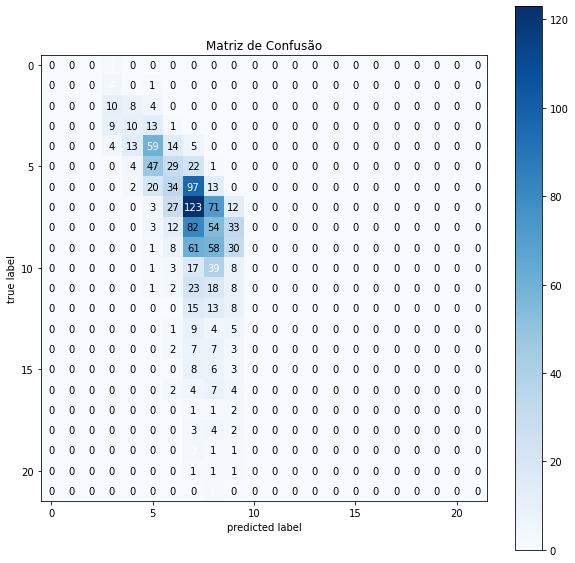

Acurácia:  0.24740622505985635
F-score:  0.24740622505985635
Precisão:  0.24740622505985635
Revocação:  0.24740622505985635


In [ ]:
Courotine_in_prev_storaged_model('Abalone_model_set.joblib', X_test.values, Y_test)